### module loading

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
import pprint as pp

In [4]:
from sklearn import linear_model

In [5]:
from input_process import input_process_pkb

In [111]:
# input dir
input_dir = "/Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/"

### input object

In [112]:
%run -t arg_reading.py regression /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2 /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/results predictor.txt predictor_sets.txt response.txt poly3 L1 -maxiter 300 -rate 0.01 -pen 1 -test test_label4.txt -clinical clinical.txt


IPython CPU timings (estimated):
  User   :       0.01 s.
  System :       0.17 s.
Wall time:       0.49 s.


<Figure size 864x720 with 0 Axes>

In [113]:
pickle_file = "args.pickle" 
fo = open(pickle_file,'rb')  
args = pickle.load(fo)


In [114]:
inputs = input_process_pkb.input_obj(args)

In [115]:
dir(inputs)

['Lambda',
 'Ngroup',
 'Npred',
 'Npred_clin',
 'Ntest',
 'Ntrain',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clinical_file',
 'data_preprocessing',
 'data_split',
 'group_file',
 'group_names',
 'hasClinical',
 'hasTest',
 'input_folder',
 'input_summary',
 'kernel',
 'loaded',
 'maxiter',
 'method',
 'model_param',
 'nu',
 'output_folder',
 'pen',
 'pred_sets',
 'problem',
 'proc_input',
 'test_clinical',
 'test_file',
 'test_predictors',
 'test_response',
 'train_clinical',
 'train_predictor_file',
 'train_predictors',
 'train_response',
 'train_response_file']

In [116]:
# process the input
inputs.proc_input()


------------------------ LOAD DATA -------------------------
reading file: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/predictor_sets.txt
reading file: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/predictor.txt
reading file: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/response.txt
reading file: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/clinical.txt


In [118]:
# preprocessing the data
inputs.data_preprocessing(center=True)


----------------------- PROCESS DATA -----------------------
Centering data.
Checking groups.


In [119]:
# summary of the inputs
inputs.input_summary()


------------------------- SUMMARY --------------------------
Analysis type: regression
input folder: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2
output folder: /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/results
number of training samples: 200
number of testing samples: 0
number of pathways: 10
number of gene predictors: 50
number of clinical predictors: 7


In [120]:
# summary of the parameters
inputs.model_param()


------------------------ PARAMETERS ------------------------
learning rate: 0.01
Lambda: None
maximum iteration: 300
kernel function:  poly3
method:  L1


### Models


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [122]:
# check the input matrix
inputs.train_predictors

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene41,gene42,gene43,gene44,gene45,gene46,gene47,gene48,gene49,gene50
sample,,,,,,,,,,,,,,,,,,,,,
sample1,0.62585,-2.095795,0.594285,-0.49567,0.04406,2.37912,-1.42425,-0.17463,-0.775065,-1.050445,...,-0.0389,0.471485,-1.17837,1.07201,0.088885,0.280505,-0.934725,0.11307,0.53707,-2.36424
sample2,-0.22915,-2.109795,0.363285,1.07533,2.07106,-0.11188,0.21775,-0.09563,0.344935,-1.763445,...,-0.0109,-0.222515,-1.42737,-2.46899,2.307885,-0.824495,-1.000725,-0.20193,-1.23793,-1.04424
sample3,1.62485,-0.605795,-2.475715,-0.95867,-0.20594,-1.87588,1.37575,2.10537,-1.669065,0.044555,...,-0.4679,0.510485,-0.05437,0.55401,2.104885,-1.786495,-0.295725,-0.03293,-1.40493,1.15176
sample4,1.77485,1.083205,-0.418715,-0.74367,-0.92194,0.59412,-1.04325,-1.37663,-1.619065,1.131555,...,0.7401,-0.719515,-1.73337,1.37101,0.905885,-0.179495,-1.061725,-1.14893,-0.31793,-0.47424
sample5,-2.30415,0.315205,-0.072715,0.34233,0.79206,1.06412,0.11975,-0.43763,0.603935,-1.489445,...,-0.3779,-0.377515,1.73663,0.38301,-2.268115,1.655505,-0.453725,2.08107,-0.53993,-0.25924
sample6,-0.42815,0.235205,-0.576715,1.68433,-0.75294,-0.02788,-0.37525,-1.32963,1.386935,-1.569445,...,0.0141,0.895485,-1.14337,-0.63199,0.155885,-0.263495,0.765275,-0.39793,-1.22893,-0.32924
sample7,-0.82315,0.039205,-0.448715,-0.25367,-1.34394,0.26512,-1.42125,-0.42163,1.378935,-0.650445,...,-1.3359,-0.067515,0.67263,-0.91099,0.079885,-0.355495,-0.289725,-0.32993,-1.00293,0.36776
sample8,-0.42615,0.381205,-0.379715,0.67633,-1.28494,-0.63088,1.25775,0.01337,-0.474065,-0.905445,...,0.8971,1.199485,-0.92637,-0.17899,0.951885,-1.154495,1.243275,-0.85893,0.75207,-0.19424
sample9,-0.23715,0.200205,-1.283715,-0.00367,-1.13994,-0.52488,-0.44125,1.60937,1.766935,-0.436445,...,-0.8579,1.494485,1.35763,0.45501,-0.981115,-0.325495,-0.335725,0.26007,-0.63093,0.15676


In [123]:
# check the clinical matrix
inputs.train_clinical

,clinical1,clinical2,clinical3,clinical4,clinical5,clinical6,clinical7,intercept
sample,,,,,,,,
sample1,-0.006,0.0,1.0,0.0,1.0,1.0,0.0,1.0
sample2,0.782,1.0,1.0,0.0,2.0,2.0,2.0,1.0
sample3,-0.517,0.0,0.0,0.0,2.0,2.0,1.0,1.0
sample4,0.645,0.0,1.0,0.0,2.0,0.0,1.0,1.0
sample5,0.082,1.0,1.0,1.0,0.0,0.0,2.0,1.0
sample6,0.862,1.0,0.0,0.0,0.0,0.0,1.0,1.0
sample7,-0.714,1.0,1.0,0.0,0.0,2.0,2.0,1.0
sample8,-1.039,1.0,1.0,0.0,1.0,2.0,1.0,1.0
sample9,0.683,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [124]:
# join two dataframes and get the predictors
predictors = pd.merge(inputs.train_predictors,inputs.train_clinical, left_index=True, right_index=True)

In [125]:
# dimension of the shape 
predictors.shape

(200, 58)

In [126]:
# responses
responses = inputs.train_response

In [127]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [128]:
linreg = LinearRegression(normalize=True)
linreg.fit(predictors, responses)
y_pred = linreg.predict(predictors)

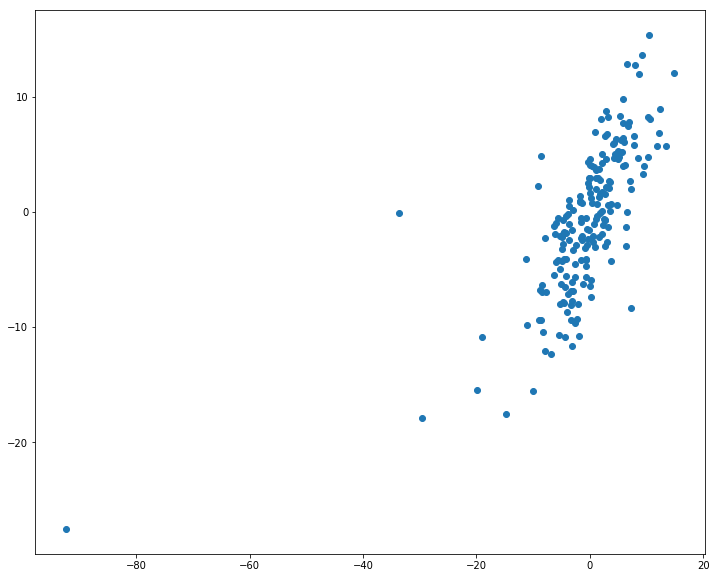

In [129]:
plt.scatter(responses,y_pred)

In [130]:
# loss function
def loss(y,y_prime):
    return(np.mean((y - y_prime)**2))

In [131]:
loss(responses, y_pred)

response    43.562203
dtype: float64

In [132]:
# ridge regression
from sklearn.linear_model import Ridge
#Fit the model
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0.1, 1, 5, 10, 20]
ridge_list = []
for alpha in alpha_ridge:
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(predictors, responses)
    y_pred_ridge = ridgereg.predict(predictors)
    ridge_list.append((alpha, loss(responses, y_pred_ridge)))
    
    
    


In [133]:
pp.pprint(ridge_list)

[(1e-15, response    43.562203
dtype: float64),
 (1e-10, response    43.562203
dtype: float64),
 (1e-08, response    43.562203
dtype: float64),
 (0.0001, response    43.562204
dtype: float64),
 (0.001, response    43.562271
dtype: float64),
 (0.01, response    43.568753
dtype: float64),
 (0.1, response    44.045544
dtype: float64),
 (1, response    54.043413
dtype: float64),
 (5, response    70.904192
dtype: float64),
 (10, response    76.203411
dtype: float64),
 (20, response    79.547641
dtype: float64)]


In [134]:
(ridge_list[0][1]).astype(float)



response    43.562203
dtype: float64

In [135]:
# ridge regression
from sklearn.linear_model import Lasso
#Fit the model
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1,1, 5, 10, 20]
lasso_list = []
for alpha in alpha_lasso:
    for 
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(predictors, responses)
    y_pred_lasso = lassoreg.predict(predictors)
    lasso_list.append((alpha, loss(responses.values, y_pred_lasso)))

SyntaxError: invalid syntax (<ipython-input-135-8730d8c9e82a>, line 7)

In [136]:
lasso_list

[]

In [64]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'arg_reading.py',
 'args.pickle',
 'input_process',
 'input_test.ipynb',
 'linear_model.ipynb',
 'README.md']

### Cross Validation

In [137]:
# loss validation
def collect_loss(df):
    new_dict = {}
    for key in df:
        new_dict[key] = np.mean(df[key])
    return new_dict
        

In [138]:
# cross validation
test_label_list = []
for file_name in os.listdir(input_dir):
    if file_name.startswith("test_label"):
        tmp_df = pd.read_table(input_dir+file_name,header=None)
        test_label_list.append(tmp_df.values)

In [139]:
# lasso cross validation
lasso_dict = {}
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1,1, 5, 10, 20]
for i in range(5):
    test_lab = inputs.input_folder+'/test_label'+str(i)+'.txt'
    print("working on "+test_lab+'\n')
    f  = open(test_lab,'r')
    test_ind = [x.strip() for x in f]
    f.close()
    # get the index
    train_ind = np.setdiff1d(inputs.train_predictors.index.values,np.array(test_ind))
    # get the data
    Xtrain = predictors.loc[train_ind]
    ytrain = responses.loc[train_ind]
    Xtest = predictors.loc[test_ind]
    ytest = responses.loc[test_ind]
    lasso_list = []
    for alpha in alpha_lasso:
        lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
        lassoreg.fit(Xtrain, ytrain)
        y_pred_lasso = lassoreg.predict(Xtest)
        try:
            lasso_dict[alpha].append(loss(ytest.values, y_pred_lasso)) 
        except KeyError:
            lasso_dict[alpha] = [loss(ytest.values, y_pred_lasso)]

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label1.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label2.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label3.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label4.txt



In [96]:
lasso_dict

{1e-15: [312.5644425075598,
  108.0299244626885,
  208.14018709939302,
  124.93321477347774,
  123.32950790908622],
 1e-10: [312.56444205096193,
  108.02992373700631,
  208.1401856219119,
  124.93321416558753,
  123.32950724056465],
 1e-08: [312.5643968650378,
  108.02985190472049,
  208.1400392205226,
  124.93315302993356,
  123.32944104706863],
 0.0001: [312.11342337368615,
  107.30845137236093,
  206.67350768052063,
  124.30646276950412,
  122.66160074084006],
 0.001: [308.43132177571465,
  103.34728940298601,
  194.57743863543394,
  120.04116721869183,
  116.90533725837055],
 0.01: [291.4871578455829,
  79.95132978105975,
  125.88659354694659,
  100.79131279963876,
  81.2161457175534],
 0.1: [247.06611246814492,
  54.09462398707427,
  56.712395188640805,
  54.473245800627225,
  55.84482305261086],
 1: [241.33003081196676,
  33.96992620492954,
  36.806423428379645,
  39.53661358042604,
  56.4316493217104],
 5: [241.33003081196676,
  33.96992620492954,
  36.806423428379645,
  39.5366

In [140]:
res_dict = collect_loss(lasso_dict)

In [141]:
res_dict

{1e-15: 135.96762032381022,
 1e-10: 135.96762012393023,
 1e-08: 135.96760033926068,
 0.0001: 135.76819563301427,
 0.001: 134.06843312738772,
 0.01: 121.58138613127498,
 0.1: 89.32817583754107,
 1: 85.23777807831115,
 5: 85.23777807831115,
 10: 85.23777807831115,
 20: 85.23777807831115}

In [142]:
# ridge cross validation
ridge_dict = {}
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1,1, 5, 10, 20]
for i in range(5):
    test_lab = inputs.input_folder+'/test_label'+str(i)+'.txt'
    print("working on "+test_lab+'\n')
    f  = open(test_lab,'r')
    test_ind = [x.strip() for x in f]
    f.close()
    # get the index
    train_ind = np.setdiff1d(inputs.train_predictors.index.values,np.array(test_ind))
    # get the data
    Xtrain = predictors.loc[train_ind]
    ytrain = responses.loc[train_ind]
    Xtest = predictors.loc[test_ind]
    ytest = responses.loc[test_ind]
    for alpha in alpha_ridge:
        ridgereg = Ridge(alpha=alpha,normalize=True, max_iter=1e5)
        ridgereg.fit(Xtrain, ytrain)
        y_pred_ridge = ridgereg.predict(Xtest)
        try:
            ridge_dict[alpha].append(loss(ytest.values, y_pred_ridge)) 
        except KeyError:
            ridge_dict[alpha] = [loss(ytest.values, y_pred_ridge)]

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label1.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label2.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label3.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression2/test_label4.txt



In [143]:
ridge_dict

{1e-15: [51.05298349395677,
  48.168945215185126,
  50.63853534110424,
  270.6415590765464,
  49.46338307358713],
 1e-10: [51.05298347872785,
  48.168945198344296,
  50.63853533015292,
  270.64155907479295,
  49.463383061124645],
 1e-08: [51.05298197104793,
  48.16894353108203,
  50.63853424596003,
  270.64155890120026,
  49.46338182732651],
 0.0001: [51.03776129037171,
  48.152113042097376,
  50.627587177853194,
  270.6398075304761,
  49.45092527155178],
 0.001: [50.90137825993452,
  48.00141696242089,
  50.529347900452834,
  270.6242151821447,
  49.339235969498574],
 0.01: [49.595738824658454,
  46.56924501517905,
  49.57509964239806,
  270.48440825149436,
  48.26345836874005],
 0.1: [40.469194599088766,
  37.2206042881269,
  42.154269203046645,
  270.1264579568783,
  40.510237522530375],
 1: [22.742579231226067,
  25.452438803472084,
  23.787008995997468,
  278.4614663122376,
  28.070721177178257],
 5: [21.645562176291026,
  30.016948874440203,
  23.30842615837229,
  290.99335142242

In [144]:
res_dict = collect_loss(ridge_dict)

In [145]:
res_dict

{1e-15: 93.99308124007594,
 1e-10: 93.99308122862854,
 1e-08: 93.99308009532334,
 0.0001: 93.98163886247004,
 0.001: 93.87911885489031,
 0.01: 92.897590020494,
 0.1: 86.0961527139342,
 1: 75.70284290402229,
 5: 79.82906948085775,
 10: 81.98354558931571,
 20: 83.43738147958264}

In [108]:
# ElasticNet
from sklearn.linear_model import ElasticNet

In [109]:
# elastic net cross validation
en_dict = {}
alpha_list = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1,1, 5, 10, 20]
alpha_ratio = [0, 1e-10, 1e-4, 1e-2,0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1]
for i in range(5):
    for ratio in alpha_ratio:
        test_lab = inputs.input_folder+'/test_label'+str(i)+'.txt'
        print("working on "+test_lab+'\n')
        f  = open(test_lab,'r')
        test_ind = [x.strip() for x in f]
        f.close()
        # get the index
        train_ind = np.setdiff1d(inputs.train_predictors.index.values,np.array(test_ind))
        # get the data
        Xtrain = predictors.loc[train_ind]
        ytrain = responses.loc[train_ind]
        Xtest = predictors.loc[test_ind]
        ytest = responses.loc[test_ind]
        for alpha in alpha_ridge:
            enreg = ElasticNet(alpha=alpha, l1_ratio=ratio)
            enreg.fit(Xtrain, ytrain)
            y_pred_en = enreg.predict(Xtest)
            try:
                en_dict[alpha].append(loss(ytest.values, y_pred_en)) 
            except KeyError:
                en_dict[alpha] = [loss(ytest.values, y_pred_en)]

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt


/Users/jerome/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regression/test_label0.txt

working on /Users/jerome/Projects/PKB2_development/data/simu_toy_regr

In [110]:
(212.9148 + 26.1820 + 25.7303 + 21.3614 + 46.7667)/5

66.59103999999999

In [117]:
(216.2818 + 25.4043 + 30.1748 + 17.1966 + 49.1415)/5


67.63980000000001

In [146]:
(19.6852 + 25.8832 + 12.7222 + 245.7845 + 19.3478)/5

64.68458000000001

In [147]:
(18.9054 + 27.7353 + 12.7221 + 246.6110 + 17.8686)/5

64.76848